In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Load the Dataset

In [2]:
# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [3]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [4]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

data_iter = iter(train_loader)
images, labels = next(data_iter)

In [5]:
images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [6]:
images[0].shape

torch.Size([1, 28, 28])

In [7]:
images[0].squeeze().shape

torch.Size([28, 28])

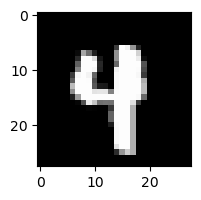

In [10]:
plt.figure(figsize = (2,2))
plt.imshow(images[4].squeeze(), cmap = "gray")
plt.show()

In [11]:
labels[4]

tensor(4)

### Train a Fully Connected Neural Network (FCNN)

In [12]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.network(x)
    

In [13]:
# Instantiate the model, define loss function and optimizer
model = DigitClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()          # Zero the gradients
        outputs = model(images)        # Forward pass
        loss = criterion(outputs, labels) # Compute loss
        loss.backward()                # Backpropagate
        optimizer.step()               # Update weights

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

Epoch [1/5], Loss: 0.4028
Epoch [2/5], Loss: 0.1960
Epoch [3/5], Loss: 0.1435
Epoch [4/5], Loss: 0.1157
Epoch [5/5], Loss: 0.0984


In [14]:
# Testing the model
model.eval()  # Switch to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

Accuracy on the test set: 96.78%
